In [3]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.8 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=ed9ee28d8f541d093479707fe1437fffec549a80b48a97590da4808fbccc68e1
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       234 non-null    object 
 1   Open       234 non-null    float64
 2   High       234 non-null    float64
 3   Low        234 non-null    float64
 4   Close      234 non-null    float64
 5   Adj Close  234 non-null    float64
 6   Volume     234 non-null    object 
dtypes: float64(5), object(2)
memory usage: 12.9+ KB
Dataframe contains crude oil prices between 2021-08-02 00:00:00 2022-07-01 00:00:00
Total days = 333 days


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


AttributeError: ignored

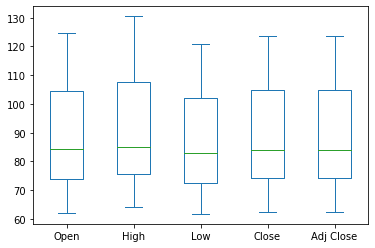

In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:



# In[2]:


oil = pd.read_csv('COPP.csv')
oil.head()


# In[3]:


oil.info()


# In[4]:


oil['Date'] = pd.to_datetime(oil['Date'])


# In[5]:


print(f'Dataframe contains crude oil prices between {oil.Date.min()} {oil.Date.max()}') 
print(f'Total days = {(oil.Date.max()  - oil.Date.min()).days} days')


# In[6]:


oil.describe()


# In[7]:


oil[['Open','High','Low','Close','Adj Close']].plot(kind='box')


# In[8]:


layout = go.Layout(
    title=' Prices of crude oil ',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

oil_data = [{'x':oil['Date'], 'y':oil['Close']}]
plot = go.Figure(data = oil_data, layout=layout)


# In[9]:


iplot(plot)


# LSTM

# In[10]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout


# In[11]:


data = pd.read_excel('COPP TRAIN.xlsx')
data.head()


# In[12]:


data.info()


# In[13]:


data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values


# In[14]:


data.info()


# In[15]:


sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape


# In[16]:


X_train = []
y_train = []

for i in range (60,165): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)


# In[17]:


X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape


# In[18]:


model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


# In[19]:


hist = model.fit(X_train, y_train, epochs = 70, batch_size = 32, verbose=2)


# In[20]:


plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


# In[21]:


testData = pd.read_csv('COPP TEST.csv')

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


# In[22]:


y_pred = model.predict(X_test)
y_pred


# In[23]:


predicted_price = sc.inverse_transform(y_pred)


# In[ ]:





# In[24]:


plt.plot(predicted_price, color = 'green', label = 'Predicted crude oil Price')
plt.title('Crude Oil price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# In[25]:


print(predicted_price)


# In[ ]:





In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
oil = pd.read_csv('COPP.csv')
oil.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jul 01, 2022",106.01,109.34,104.56,108.43,108.43,"3,05,338"
1,"Jun 30, 2022",109.70,110.45,105.10,105.76,105.76,"3,62,890"
2,"Jun 29, 2022",111.86,114.05,109.22,109.78,109.78,"3,22,060"
3,"Jun 28, 2022",110.18,112.22,109.62,111.76,111.76,"3,06,748"
4,"Jun 27, 2022",107.22,110.54,105.60,109.57,109.57,"2,82,914"


In [8]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       234 non-null    object 
 1   Open       234 non-null    float64
 2   High       234 non-null    float64
 3   Low        234 non-null    float64
 4   Close      234 non-null    float64
 5   Adj Close  234 non-null    float64
 6   Volume     234 non-null    object 
dtypes: float64(5), object(2)
memory usage: 12.9+ KB


In [9]:
oil['Date'] = pd.to_datetime(oil['Date'])

In [10]:
print(f'Dataframe contains crude oil prices between {oil.Date.min()} {oil.Date.max()}') 
print(f'Total days = {(oil.Date.max()  - oil.Date.min()).days} days')

Dataframe contains crude oil prices between 2021-08-02 00:00:00 2022-07-01 00:00:00
Total days = 333 days


In [11]:
oil.describe()

,Open,High,Low,Close,Adj Close
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,88.998205,90.939744,87.027564,89.069872,89.069872
std,16.867361,17.608718,16.057411,16.812016,16.812016
min,61.960000,64.100000,61.740000,62.320000,62.320000
25%,73.980000,75.760000,72.630000,74.192500,74.192500
50%,84.235000,85.190000,82.850000,84.100000,84.100000
75%,104.365000,107.760000,102.100000,104.697500,104.697500
max,124.660000,130.500000,120.790000,123.700000,123.700000


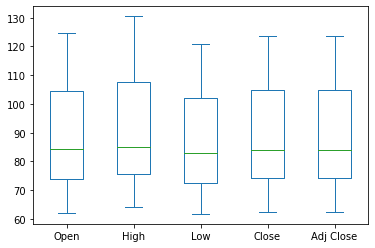

In [12]:
oil[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [13]:
layout = go.Layout(
    title=' Prices of crude oil ',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

oil_data = [{'x':oil['Date'], 'y':oil['Close']}]
plot = go.Figure(data = oil_data, layout=layout)


In [14]:
iplot(plot)

In [15]:
# LSTM

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout



In [16]:
data = pd.read_excel('COPP TRAIN.xlsx')
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [19]:
oil["Close"]=pd.to_numeric(oil.Close,errors='coerce')
oil = oil.dropna()
trainData = oil.iloc[:,4:5].values


In [22]:
oil.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       234 non-null    datetime64[ns]
 1   Open       234 non-null    float64       
 2   High       234 non-null    float64       
 3   Low        234 non-null    float64       
 4   Close      234 non-null    float64       
 5   Adj Close  234 non-null    float64       
 6   Volume     234 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.6+ KB


In [24]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(234, 1)

In [25]:
X_train = []
y_train = []

for i in range (60,165): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [26]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(105, 60, 1)

In [27]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [28]:

hist = model.fit(X_train, y_train, epochs = 70, batch_size = 32, verbose=2)

Epoch 1/70
4/4 - 34s - loss: 0.1414 - 34s/epoch - 8s/step
Epoch 2/70
4/4 - 1s - loss: 0.0509 - 822ms/epoch - 206ms/step
Epoch 3/70
4/4 - 1s - loss: 0.0370 - 794ms/epoch - 198ms/step
Epoch 4/70
4/4 - 1s - loss: 0.0272 - 783ms/epoch - 196ms/step
Epoch 5/70
4/4 - 1s - loss: 0.0238 - 805ms/epoch - 201ms/step
Epoch 6/70
4/4 - 1s - loss: 0.0221 - 1s/epoch - 285ms/step
Epoch 7/70
4/4 - 1s - loss: 0.0204 - 1s/epoch - 352ms/step
Epoch 8/70
4/4 - 2s - loss: 0.0227 - 2s/epoch - 399ms/step
Epoch 9/70
4/4 - 1s - loss: 0.0166 - 889ms/epoch - 222ms/step
Epoch 10/70
4/4 - 1s - loss: 0.0187 - 807ms/epoch - 202ms/step
Epoch 11/70
4/4 - 1s - loss: 0.0195 - 790ms/epoch - 198ms/step
Epoch 12/70
4/4 - 1s - loss: 0.0158 - 799ms/epoch - 200ms/step
Epoch 13/70
4/4 - 1s - loss: 0.0161 - 780ms/epoch - 195ms/step
Epoch 14/70
4/4 - 1s - loss: 0.0199 - 792ms/epoch - 198ms/step
Epoch 15/70
4/4 - 1s - loss: 0.0186 - 775ms/epoch - 194ms/step
Epoch 16/70
4/4 - 1s - loss: 0.0187 - 808ms/epoch - 202ms/step
Epoch 17/70
4/

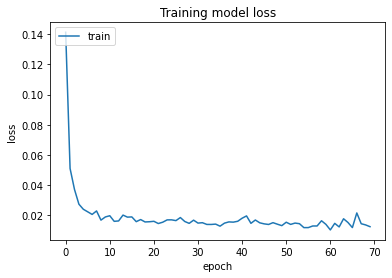

In [29]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testData = pd.read_csv('COPP.csv')

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

In [36]:
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


(174, 60, 1)

In [37]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 59ms/step


array([[2.0460818],
       [2.0463521],
       [2.0465672],
       [2.046759 ],
       [2.0469463],
       [2.047101 ],
       [2.0471642],
       [2.0471487],
       [2.047105 ],
       [2.046998 ],
       [2.0468187],
       [2.0465653],
       [2.0463414],
       [2.0461004],
       [2.0459445],
       [2.0458837],
       [2.045963 ],
       [2.0461679],
       [2.0464065],
       [2.0465808],
       [2.0467145],
       [2.0467994],
       [2.046707 ],
       [2.0465038],
       [2.0462558],
       [2.0460577],
       [2.0458922],
       [2.045799 ],
       [2.0458527],
       [2.046082 ],
       [2.0464606],
       [2.0469296],
       [2.04744  ],
       [2.048    ],
       [2.0485795],
       [2.0491142],
       [2.0495942],
       [2.0500166],
       [2.050342 ],
       [2.0506806],
       [2.0510645],
       [2.0514426],
       [2.0518022],
       [2.0520864],
       [2.052368 ],
       [2.0526507],
       [2.0529506],
       [2.0532348],
       [2.0535326],
       [2.0538156],


In [38]:
predicted_price = sc.inverse_transform(y_pred)

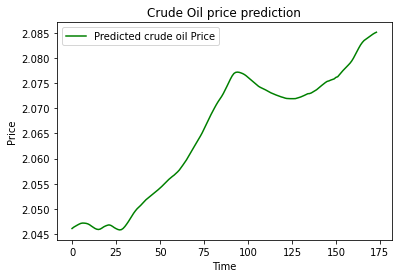

In [39]:

plt.plot(predicted_price, color = 'green', label = 'Predicted crude oil Price')
plt.title('Crude Oil price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
print(predicted_price)

[[2.0460818]
 [2.0463521]
 [2.0465672]
 [2.046759 ]
 [2.0469463]
 [2.047101 ]
 [2.0471642]
 [2.0471487]
 [2.047105 ]
 [2.046998 ]
 [2.0468187]
 [2.0465653]
 [2.0463414]
 [2.0461004]
 [2.0459445]
 [2.0458837]
 [2.045963 ]
 [2.0461679]
 [2.0464065]
 [2.0465808]
 [2.0467145]
 [2.0467994]
 [2.046707 ]
 [2.0465038]
 [2.0462558]
 [2.0460577]
 [2.0458922]
 [2.045799 ]
 [2.0458527]
 [2.046082 ]
 [2.0464606]
 [2.0469296]
 [2.04744  ]
 [2.048    ]
 [2.0485795]
 [2.0491142]
 [2.0495942]
 [2.0500166]
 [2.050342 ]
 [2.0506806]
 [2.0510645]
 [2.0514426]
 [2.0518022]
 [2.0520864]
 [2.052368 ]
 [2.0526507]
 [2.0529506]
 [2.0532348]
 [2.0535326]
 [2.0538156]
 [2.0541232]
 [2.0544496]
 [2.0547996]
 [2.0551572]
 [2.0555232]
 [2.0558512]
 [2.0561512]
 [2.0564415]
 [2.0567029]
 [2.0570247]
 [2.0573528]
 [2.0577328]
 [2.0582023]
 [2.0587032]
 [2.0591977]
 [2.0597208]
 [2.0603123]
 [2.0609164]
 [2.0615215]
 [2.0621316]
 [2.06272  ]
 [2.0633018]
 [2.0638843]
 [2.0645008]
 [2.0651433]
 [2.0658789]
 [2.066613 ]